In [781]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

In [782]:
X_train, y_train = pd.read_csv('../data/X_train.csv'), pd.read_csv('../data/y_train.csv')

In [783]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train,
    y_train,
    test_size=0.1,
    random_state=42,
    shuffle=True,
    stratify=y_train
)

In [784]:
y_train

,Correto
90,S
28,N
959,S
912,N
981,N
...,...
968,S
1042,S
849,S
760,N


## 7. Machine Learning Model Building

### Model training

In [785]:
classifier = DummyClassifier(strategy="uniform")

In [786]:
y_train.values.ravel().shape

(962,)

In [787]:
classifier.fit(X_train, y_train.values.ravel())

DummyClassifier(strategy='uniform')

### Performance on training set

In [788]:
preds = classifier.predict(X_train)

In [789]:
from sklearn.metrics import confusion_matrix, classification_report
target_names=["S", "N"]
print(classification_report(y_train, preds, target_names=target_names))

              precision    recall  f1-score   support

           S       0.28      0.48      0.36       281
           N       0.70      0.49      0.58       681

    accuracy                           0.49       962
   macro avg       0.49      0.49      0.47       962
weighted avg       0.58      0.49      0.51       962



[Text(0, 0.5, 'S'), Text(0, 1.5, 'N')]

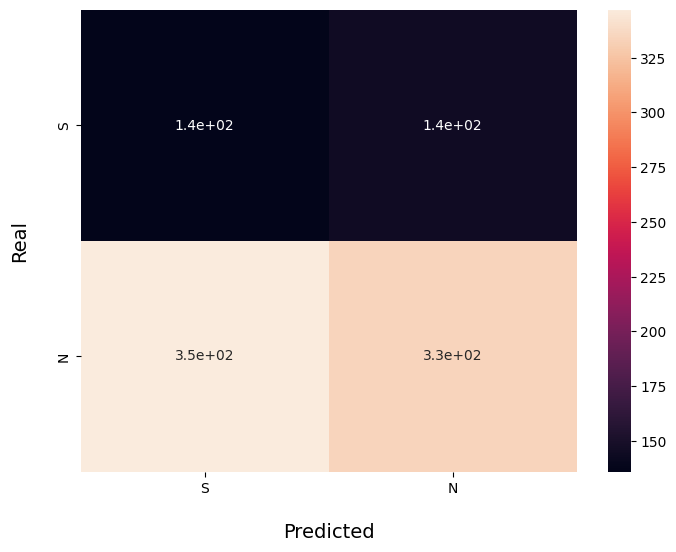

In [790]:
import matplotlib.pyplot as plt
import seaborn as sns

cf_matrix = confusion_matrix(y_train, preds)
plt.figure(figsize=(8,6), dpi=100)

ax = sns.heatmap(cf_matrix, annot=True)

# set x-axis label and ticks. 
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(target_names)
 
# set y-axis label and ticks
ax.set_ylabel("Real", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(target_names)

## 8. Model Evaluation

In [791]:
test_preds = classifier.predict(X_test)

In [792]:
target_names=["S", "N"]
print(classification_report(y_test, test_preds, target_names=target_names))

              precision    recall  f1-score   support

           S       0.38      0.58      0.46        31
           N       0.78      0.61      0.68        76

    accuracy                           0.60       107
   macro avg       0.58      0.59      0.57       107
weighted avg       0.66      0.60      0.62       107



[Text(0, 0.5, 'S'), Text(0, 1.5, 'N')]

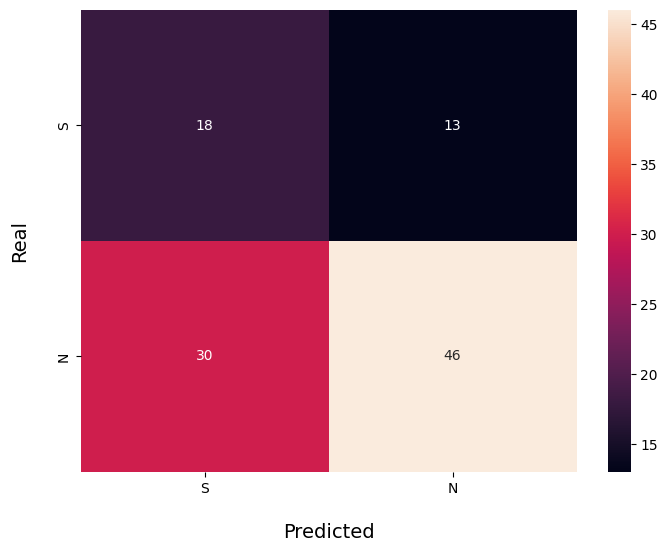

In [793]:
cf_matrix = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8,6), dpi=100)

ax = sns.heatmap(cf_matrix, annot=True)

# set x-axis label and ticks. 
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(target_names)
 
# set y-axis label and ticks
ax.set_ylabel("Real", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(target_names)